<a href="https://colab.research.google.com/github/Mjn92/Mjn92/blob/main/picrec001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

#We will be using VGG16 for ReverseSearch
model = VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
# Downloads the dataset folder and unzips
!gdown --id 1VKrl_Ehig5q4b56ZUcQJzn5H0XofqxNS
!unzip /content/lfw.zip


In [ ]:
# Helper Function for Displaying Images
def load_image(filePath):
    # Makes sure that the image from Dir is same as the model inference input (224x224)
    img = image.load_img(filePath, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

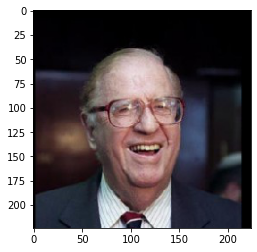

In [ ]:
# Testing Helper Fucntion
img, x = load_image("/content/lfw/Abba_Eban_0001.jpg")
plt.imshow(img)

In [ ]:
# We only want the features from the model, not its output
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)

In [ ]:
import random
import os

ImgDirPath = '/content/lfw'
imgExtensions = ['.jpg' ,'.jpeg']   
numImages = 13223

# Crawls the image dataset directory for the image files
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(ImgDirPath) for f in filenames if os.path.splitext(f)[1].lower() in imgExtensions]
if numImages < len(images):
    images = [images[i] for i in sorted(random.sample(range(len(images)), numImages))]

In [ ]:
import time
from tqdm import tqdm

# Infers and Appends the feature output of the model, benchmark at every 1000 for time elapse user reference
features = []
for i, image_path in enumerate(tqdm(images)):
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)
    if i % 1000 == 0:
      print("Image %d / %d." % (i, len(images)))

print("Feature Extraction Complete")

  0%|          | 2/13223 [00:08<12:54:03,  3.51s/it]

Image 0 / 13223.


  8%|▊         | 1002/13223 [01:52<20:51,  9.76it/s]

Image 1000 / 13223.


 15%|█▌        | 2002/13223 [03:40<20:25,  9.15it/s]

Image 2000 / 13223.


 23%|██▎       | 3001/13223 [05:24<16:53, 10.09it/s]

Image 3000 / 13223.


 30%|███       | 4002/13223 [07:05<15:13, 10.10it/s]

Image 4000 / 13223.


 38%|███▊      | 5002/13223 [08:47<13:32, 10.12it/s]

Image 5000 / 13223.


 45%|████▌     | 6002/13223 [10:27<12:35,  9.56it/s]

Image 6000 / 13223.


 53%|█████▎    | 7003/13223 [12:11<10:12, 10.15it/s]

Image 7000 / 13223.


 61%|██████    | 8002/13223 [13:50<08:25, 10.32it/s]

Image 8000 / 13223.


 68%|██████▊   | 9002/13223 [15:34<07:08,  9.85it/s]

Image 9000 / 13223.


 76%|███████▌  | 10002/13223 [17:13<06:02,  8.88it/s]

Image 10000 / 13223.


 83%|████████▎ | 11003/13223 [18:54<03:41, 10.02it/s]

Image 11000 / 13223.


 91%|█████████ | 12002/13223 [20:35<02:05,  9.75it/s]

Image 12000 / 13223.


 98%|█████████▊| 13002/13223 [22:16<00:22, 10.02it/s]

Image 13000 / 13223.


100%|██████████| 13223/13223 [22:38<00:00,  9.74it/s]

Feature Extraction Complete


In [ ]:
from sklearn.decomposition import PCA

# We are going to use principal component analysis (PCA) to find only the most highly correletated features for each of the images 
# We are only going to go with 300 componenets primarily due to processor restrictions
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

PCA(n_components=300)

In [ ]:
pca_features = pca.transform(features)

In [ ]:
from scipy.spatial import distance

def getClosestImages(imageIndex, numResults=5):
    distances = [ distance.cosine(pca_features[imageIndex], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:numResults+1]
    return idx_closest

def downsizeImages(indexes, imageIndex):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * imageIndex / img.height), imageIndex))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

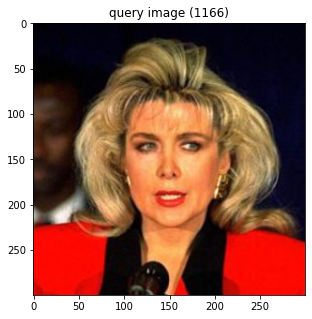

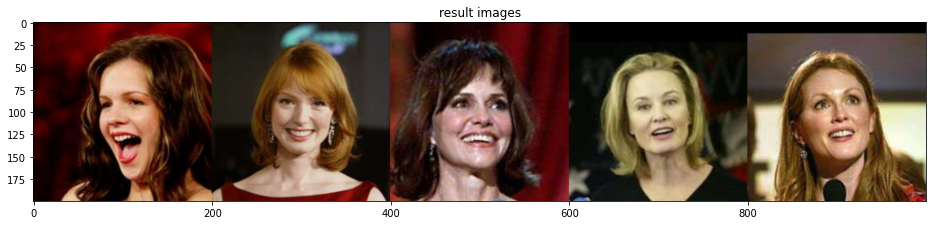

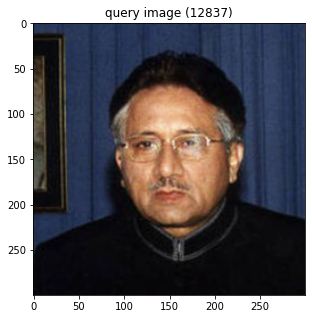

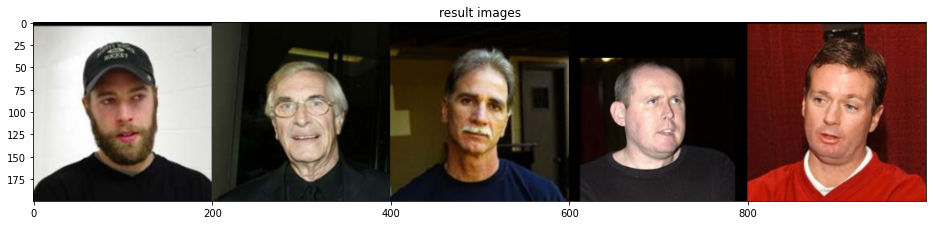

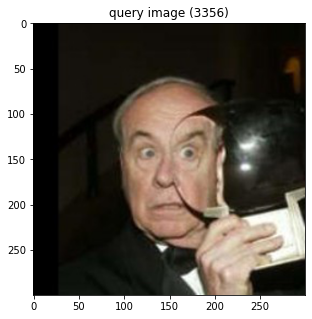

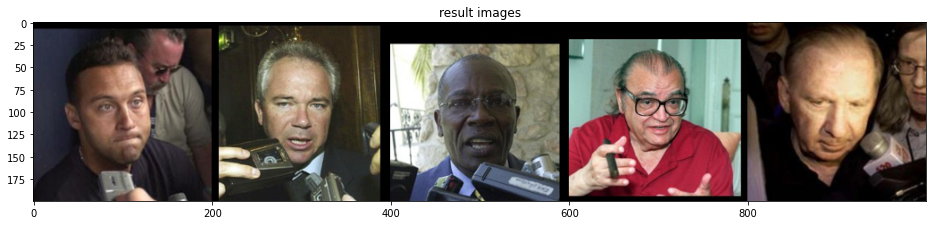

In [ ]:
for i in range(3):
  # do a query on a random image
  randomImg = int(numImages * random.random())
  idx_closest = getClosestImages(randomImg)
  query_image = downsizeImages([randomImg], 300)
  results_image = downsizeImages(idx_closest, 200)

  # display the query image
  plt.figure(figsize = (5,5))
  plt.imshow(query_image)
  plt.title("query image (%d)" % randomImg)

  # display the resulting images
  plt.figure(figsize = (16,12))
  plt.imshow(results_image)
  plt.title("result images")

In [ ]:
pip install git+https://github.com/ageitgey/face_recognition_models

  Cloning https://github.com/ageitgey/face_recognition_models to /tmp/pip-req-build-6goyvhs7
  Running command git clone -q https://github.com/ageitgey/face_recognition_models /tmp/pip-req-build-6goyvhs7
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=31697bd54755bc2f7312b72553775874d82ad7440859721eebd50c1fbed10080
  Stored in directory: /tmp/pip-ephem-wheel-cache-zyfkenyh/wheels/95/87/8f/421255af516ec4da2fd2e3823ceff50368d700cac93b66289e
Successfully built face-recognition-models


In [ ]:
pip install git+https://github.com/ageitgey/face_recognition

  Cloning https://github.com/ageitgey/face_recognition to /tmp/pip-req-build-48axb2m_
  Running command git clone -q https://github.com/ageitgey/face_recognition /tmp/pip-req-build-48axb2m_
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for face-recognition: filename=face_recognition-1.4.0-py2.py3-none-any.whl size=15686 sha256=9908d378525463aa2b7615781d17a13d40bb98aaf1c05d879390288f278a4f50
  Stored in directory: /tmp/pip-ephem-wheel-cache-qqhdnl4w/wheels/c9/8a/29/9d467b5a823e26e5a4e4e11c7d7b429f12ddb83c2bf29252e4
Successfully built face-recognition


In [ ]:
import PIL.Image
import dlib
import numpy as np
from PIL import ImageFile

try:
    import face_recognition_models
except Exception:
    print("Please install `face_recognition_models` with this command before using `face_recognition`:\n")
    print("pip install git+https://github.com/ageitgey/face_recognition_models")
    quit()

ImageFile.LOAD_TRUNCATED_IMAGES = True

face_detector = dlib.get_frontal_face_detector()

predictor_68_point_model = face_recognition_models.pose_predictor_model_location()
pose_predictor_68_point = dlib.shape_predictor(predictor_68_point_model)

predictor_5_point_model = face_recognition_models.pose_predictor_five_point_model_location()
pose_predictor_5_point = dlib.shape_predictor(predictor_5_point_model)

cnn_face_detection_model = face_recognition_models.cnn_face_detector_model_location()
cnn_face_detector = dlib.cnn_face_detection_model_v1(cnn_face_detection_model)

face_recognition_model = face_recognition_models.face_recognition_model_location()
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)


def _rect_to_css(rect):
    """
    Convert a dlib 'rect' object to a plain tuple in (top, right, bottom, left) order
    :param rect: a dlib 'rect' object
    :return: a plain tuple representation of the rect in (top, right, bottom, left) order
    """
    return rect.top(), rect.right(), rect.bottom(), rect.left()


def _css_to_rect(css):
    """
    Convert a tuple in (top, right, bottom, left) order to a dlib `rect` object
    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :return: a dlib `rect` object
    """
    return dlib.rectangle(css[3], css[0], css[1], css[2])


def _trim_css_to_bounds(css, image_shape):
    """
    Make sure a tuple in (top, right, bottom, left) order is within the bounds of the image.
    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :param image_shape: numpy shape of the image array
    :return: a trimmed plain tuple representation of the rect in (top, right, bottom, left) order
    """
    return max(css[0], 0), min(css[1], image_shape[1]), min(css[2], image_shape[0]), max(css[3], 0)


def face_distance(face_encodings, face_to_compare):
    """
    Given a list of face encodings, compare them to a known face encoding and get a euclidean distance
    for each comparison face. The distance tells you how similar the faces are.
    :param face_encodings: List of face encodings to compare
    :param face_to_compare: A face encoding to compare against
    :return: A numpy ndarray with the distance for each face in the same order as the 'faces' array
    """
    if len(face_encodings) == 0:
        return np.empty((0))

    return np.linalg.norm(face_encodings - face_to_compare, axis=1)


def load_image_file(file, mode='RGB'):
    """
    Loads an image file (.jpg, .png, etc) into a numpy array
    :param file: image file name or file object to load
    :param mode: format to convert the image to. Only 'RGB' (8-bit RGB, 3 channels) and 'L' (black and white) are supported.
    :return: image contents as numpy array
    """
    im = PIL.Image.open(file)
    if mode:
        im = im.convert(mode)
    return np.array(im)


def _raw_face_locations(img, number_of_times_to_upsample=1, model="hog"):
    """
    Returns an array of bounding boxes of human faces in a image
    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of dlib 'rect' objects of found face locations
    """
    if model == "cnn":
        return cnn_face_detector(img, number_of_times_to_upsample)
    else:
        return face_detector(img, number_of_times_to_upsample)


def face_locations(img, number_of_times_to_upsample=1, model="hog"):
    """
    Returns an array of bounding boxes of human faces in a image
    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of tuples of found face locations in css (top, right, bottom, left) order
    """
    if model == "cnn":
        return [_trim_css_to_bounds(_rect_to_css(face.rect), img.shape) for face in _raw_face_locations(img, number_of_times_to_upsample, "cnn")]
    else:
        return [_trim_css_to_bounds(_rect_to_css(face), img.shape) for face in _raw_face_locations(img, number_of_times_to_upsample, model)]


def _raw_face_locations_batched(images, number_of_times_to_upsample=1, batch_size=128):
    """
    Returns an 2d array of dlib rects of human faces in a image using the cnn face detector
    :param images: A list of images (each as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :return: A list of dlib 'rect' objects of found face locations
    """
    return cnn_face_detector(images, number_of_times_to_upsample, batch_size=batch_size)


def batch_face_locations(images, number_of_times_to_upsample=1, batch_size=128):
    """
    Returns an 2d array of bounding boxes of human faces in a image using the cnn face detector
    If you are using a GPU, this can give you much faster results since the GPU
    can process batches of images at once. If you aren't using a GPU, you don't need this function.
    :param images: A list of images (each as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param batch_size: How many images to include in each GPU processing batch.
    :return: A list of tuples of found face locations in css (top, right, bottom, left) order
    """
    def convert_cnn_detections_to_css(detections):
        return [_trim_css_to_bounds(_rect_to_css(face.rect), images[0].shape) for face in detections]

    raw_detections_batched = _raw_face_locations_batched(images, number_of_times_to_upsample, batch_size)

    return list(map(convert_cnn_detections_to_css, raw_detections_batched))


def _raw_face_landmarks(face_image, face_locations=None, model="large"):
    if face_locations is None:
        face_locations = _raw_face_locations(face_image)
    else:
        face_locations = [_css_to_rect(face_location) for face_location in face_locations]

    pose_predictor = pose_predictor_68_point

    if model == "small":
        pose_predictor = pose_predictor_5_point

    return [pose_predictor(face_image, face_location) for face_location in face_locations]


def face_landmarks(face_image, face_locations=None, model="large"):
    """
    Given an image, returns a dict of face feature locations (eyes, nose, etc) for each face in the image
    :param face_image: image to search
    :param face_locations: Optionally provide a list of face locations to check.
    :param model: Optional - which model to use. "large" (default) or "small" which only returns 5 points but is faster.
    :return: A list of dicts of face feature locations (eyes, nose, etc)
    """
    landmarks = _raw_face_landmarks(face_image, face_locations, model)
    landmarks_as_tuples = [[(p.x, p.y) for p in landmark.parts()] for landmark in landmarks]

    # For a definition of each point index, see https://cdn-images-1.medium.com/max/1600/1*AbEg31EgkbXSQehuNJBlWg.png
    if model == 'large':
        return [{
            "chin": points[0:17],
            "left_eyebrow": points[17:22],
            "right_eyebrow": points[22:27],
            "nose_bridge": points[27:31],
            "nose_tip": points[31:36],
            "left_eye": points[36:42],
            "right_eye": points[42:48],
            "top_lip": points[48:55] + [points[64]] + [points[63]] + [points[62]] + [points[61]] + [points[60]],
            "bottom_lip": points[54:60] + [points[48]] + [points[60]] + [points[67]] + [points[66]] + [points[65]] + [points[64]]
        } for points in landmarks_as_tuples]
    elif model == 'small':
        return [{
            "nose_tip": [points[4]],
            "left_eye": points[2:4],
            "right_eye": points[0:2],
        } for points in landmarks_as_tuples]
    else:
        raise ValueError("Invalid landmarks model type. Supported models are ['small', 'large'].")


def face_encodings(face_image, known_face_locations=None, num_jitters=1, model="small"):
    """
    Given an image, return the 128-dimension face encoding for each face in the image.
    :param face_image: The image that contains one or more faces
    :param known_face_locations: Optional - the bounding boxes of each face if you already know them.
    :param num_jitters: How many times to re-sample the face when calculating encoding. Higher is more accurate, but slower (i.e. 100 is 100x slower)
    :param model: Optional - which model to use. "large" or "small" (default) which only returns 5 points but is faster.
    :return: A list of 128-dimensional face encodings (one for each face in the image)
    """
    raw_landmarks = _raw_face_landmarks(face_image, known_face_locations, model)
    return [np.array(face_encoder.compute_face_descriptor(face_image, raw_landmark_set, num_jitters)) for raw_landmark_set in raw_landmarks]


def compare_faces(known_face_encodings, face_encoding_to_check, tolerance=0.6):
    """
    Compare a list of face encodings against a candidate encoding to see if they match.
    :param known_face_encodings: A list of known face encodings
    :param face_encoding_to_check: A single face encoding to compare against the list
    :param tolerance: How much distance between faces to consider it a match. Lower is more strict. 0.6 is typical best performance.
    :return: A list of True/False values indicating which known_face_encodings match the face encoding to check
    """
    return list(face_distance(known_face_encodings, face_encoding_to_check) <= tolerance)

In [ ]:

import PIL.Image
import dlib
import numpy as np
from PIL import ImageFile

try:
    import face_recognition_models
except Exception:
    print("Please install `face_recognition_models` with this command before using `face_recognition`:\n")
    print("pip install git+https://github.com/ageitgey/face_recognition_models")
    quit()

ImageFile.LOAD_TRUNCATED_IMAGES = True

face_detector = dlib.get_frontal_face_detector()

predictor_68_point_model = face_recognition_models.pose_predictor_model_location()
pose_predictor_68_point = dlib.shape_predictor(predictor_68_point_model)

predictor_5_point_model = face_recognition_models.pose_predictor_five_point_model_location()
pose_predictor_5_point = dlib.shape_predictor(predictor_5_point_model)

cnn_face_detection_model = face_recognition_models.cnn_face_detector_model_location()
cnn_face_detector = dlib.cnn_face_detection_model_v1(cnn_face_detection_model)

face_recognition_model = face_recognition_models.face_recognition_model_location()
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)


def _rect_to_css(rect):
    """
    Convert a dlib 'rect' object to a plain tuple in (top, right, bottom, left) order
    :param rect: a dlib 'rect' object
    :return: a plain tuple representation of the rect in (top, right, bottom, left) order
    """
    return rect.top(), rect.right(), rect.bottom(), rect.left()


def _css_to_rect(css):
    """
    Convert a tuple in (top, right, bottom, left) order to a dlib `rect` object
    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :return: a dlib `rect` object
    """
    return dlib.rectangle(css[3], css[0], css[1], css[2])


def _trim_css_to_bounds(css, image_shape):
    """
    Make sure a tuple in (top, right, bottom, left) order is within the bounds of the image.
    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :param image_shape: numpy shape of the image array
    :return: a trimmed plain tuple representation of the rect in (top, right, bottom, left) order
    """
    return max(css[0], 0), min(css[1], image_shape[1]), min(css[2], image_shape[0]), max(css[3], 0)


def face_distance(face_encodings, face_to_compare):
    """
    Given a list of face encodings, compare them to a known face encoding and get a euclidean distance
    for each comparison face. The distance tells you how similar the faces are.
    :param face_encodings: List of face encodings to compare
    :param face_to_compare: A face encoding to compare against
    :return: A numpy ndarray with the distance for each face in the same order as the 'faces' array
    """
    if len(face_encodings) == 0:
        return np.empty((0))

    return np.linalg.norm(face_encodings - face_to_compare, axis=1)


def load_image_file(file, mode='RGB'):
    """
    Loads an image file (.jpg, .png, etc) into a numpy array
    :param file: image file name or file object to load
    :param mode: format to convert the image to. Only 'RGB' (8-bit RGB, 3 channels) and 'L' (black and white) are supported.
    :return: image contents as numpy array
    """
    im = PIL.Image.open(file)
    if mode:
        im = im.convert(mode)
    return np.array(im)


def _raw_face_locations(img, number_of_times_to_upsample=1, model="hog"):
    """
    Returns an array of bounding boxes of human faces in a image
    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of dlib 'rect' objects of found face locations
    """
    if model == "cnn":
        return cnn_face_detector(img, number_of_times_to_upsample)
    else:
        return face_detector(img, number_of_times_to_upsample)


def face_locations(img, number_of_times_to_upsample=1, model="hog"):
    """
    Returns an array of bounding boxes of human faces in a image
    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of tuples of found face locations in css (top, right, bottom, left) order
    """
    if model == "cnn":
        return [_trim_css_to_bounds(_rect_to_css(face.rect), img.shape) for face in _raw_face_locations(img, number_of_times_to_upsample, "cnn")]
    else:
        return [_trim_css_to_bounds(_rect_to_css(face), img.shape) for face in _raw_face_locations(img, number_of_times_to_upsample, model)]


def _raw_face_locations_batched(images, number_of_times_to_upsample=1, batch_size=128):
    """
    Returns an 2d array of dlib rects of human faces in a image using the cnn face detector
    :param images: A list of images (each as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :return: A list of dlib 'rect' objects of found face locations
    """
    return cnn_face_detector(images, number_of_times_to_upsample, batch_size=batch_size)


def batch_face_locations(images, number_of_times_to_upsample=1, batch_size=128):
    """
    Returns an 2d array of bounding boxes of human faces in a image using the cnn face detector
    If you are using a GPU, this can give you much faster results since the GPU
    can process batches of images at once. If you aren't using a GPU, you don't need this function.
    :param images: A list of images (each as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param batch_size: How many images to include in each GPU processing batch.
    :return: A list of tuples of found face locations in css (top, right, bottom, left) order
    """
    def convert_cnn_detections_to_css(detections):
        return [_trim_css_to_bounds(_rect_to_css(face.rect), images[0].shape) for face in detections]

    raw_detections_batched = _raw_face_locations_batched(images, number_of_times_to_upsample, batch_size)

    return list(map(convert_cnn_detections_to_css, raw_detections_batched))


def _raw_face_landmarks(face_image, face_locations=None, model="large"):
    if face_locations is None:
        face_locations = _raw_face_locations(face_image)
    else:
        face_locations = [_css_to_rect(face_location) for face_location in face_locations]

    pose_predictor = pose_predictor_68_point

    if model == "small":
        pose_predictor = pose_predictor_5_point

    return [pose_predictor(face_image, face_location) for face_location in face_locations]


def face_landmarks(face_image, face_locations=None, model="large"):
    """
    Given an image, returns a dict of face feature locations (eyes, nose, etc) for each face in the image
    :param face_image: image to search
    :param face_locations: Optionally provide a list of face locations to check.
    :param model: Optional - which model to use. "large" (default) or "small" which only returns 5 points but is faster.
    :return: A list of dicts of face feature locations (eyes, nose, etc)
    """
    landmarks = _raw_face_landmarks(face_image, face_locations, model)
    landmarks_as_tuples = [[(p.x, p.y) for p in landmark.parts()] for landmark in landmarks]

    # For a definition of each point index, see https://cdn-images-1.medium.com/max/1600/1*AbEg31EgkbXSQehuNJBlWg.png
    if model == 'large':
        return [{
            "chin": points[0:17],
            "left_eyebrow": points[17:22],
            "right_eyebrow": points[22:27],
            "nose_bridge": points[27:31],
            "nose_tip": points[31:36],
            "left_eye": points[36:42],
            "right_eye": points[42:48],
            "top_lip": points[48:55] + [points[64]] + [points[63]] + [points[62]] + [points[61]] + [points[60]],
            "bottom_lip": points[54:60] + [points[48]] + [points[60]] + [points[67]] + [points[66]] + [points[65]] + [points[64]]
        } for points in landmarks_as_tuples]
    elif model == 'small':
        return [{
            "nose_tip": [points[4]],
            "left_eye": points[2:4],
            "right_eye": points[0:2],
        } for points in landmarks_as_tuples]
    else:
        raise ValueError("Invalid landmarks model type. Supported models are ['small', 'large'].")


def face_encodings(face_image, known_face_locations=None, num_jitters=1, model="small"):
    """
    Given an image, return the 128-dimension face encoding for each face in the image.
    :param face_image: The image that contains one or more faces
    :param known_face_locations: Optional - the bounding boxes of each face if you already know them.
    :param num_jitters: How many times to re-sample the face when calculating encoding. Higher is more accurate, but slower (i.e. 100 is 100x slower)
    :param model: Optional - which model to use. "large" or "small" (default) which only returns 5 points but is faster.
    :return: A list of 128-dimensional face encodings (one for each face in the image)
    """
    raw_landmarks = _raw_face_landmarks(face_image, known_face_locations, model)
    return [np.array(face_encoder.compute_face_descriptor(face_image, raw_landmark_set, num_jitters)) for raw_landmark_set in raw_landmarks]


def compare_faces(known_face_encodings, face_encoding_to_check, tolerance=0.6):
    """
    Compare a list of face encodings against a candidate encoding to see if they match.
    :param known_face_encodings: A list of known face encodings
    :param face_encoding_to_check: A single face encoding to compare against the list
    :param tolerance: How much distance between faces to consider it a match. Lower is more strict. 0.6 is typical best performance.
    :return: A list of True/False values indicating which known_face_encodings match the face encoding to check
    """
    return list(face_distance(known_face_encodings, face_encoding_to_check) <= tolerance)

In [ ]:
from __future__ import print_function
import click
import os
import re
import face_recognition.api as face_recognition
import multiprocessing
import itertools
import sys
import PIL.Image
import numpy as np


def scan_known_people(known_people_folder):
    known_names = []
    known_face_encodings = []

    for file in image_files_in_folder(known_people_folder):
        basename = os.path.splitext(os.path.basename(file))[0]
        img = face_recognition.load_image_file(file)
        encodings = face_recognition.face_encodings(img)

        if len(encodings) > 1:
            click.echo("WARNING: More than one face found in {}. Only considering the first face.".format(file))

        if len(encodings) == 0:
            click.echo("WARNING: No faces found in {}. Ignoring file.".format(file))
        else:
            known_names.append(basename)
            known_face_encodings.append(encodings[0])

    return known_names, known_face_encodings


def print_result(filename, name, distance, show_distance=False):
    if show_distance:
        print("{},{},{}".format(filename, name, distance))
    else:
        print("{},{}".format(filename, name))


def test_image(image_to_check, known_names, known_face_encodings, tolerance=0.6, show_distance=False):
    unknown_image = face_recognition.load_image_file(image_to_check)

    # Scale down image if it's giant so things run a little faster
    if max(unknown_image.shape) > 1600:
        pil_img = PIL.Image.fromarray(unknown_image)
        pil_img.thumbnail((1600, 1600), PIL.Image.LANCZOS)
        unknown_image = np.array(pil_img)

    unknown_encodings = face_recognition.face_encodings(unknown_image)

    for unknown_encoding in unknown_encodings:
        distances = face_recognition.face_distance(known_face_encodings, unknown_encoding)
        result = list(distances <= tolerance)

        if True in result:
            [print_result(image_to_check, name, distance, show_distance) for is_match, name, distance in zip(result, known_names, distances) if is_match]
        else:
            print_result(image_to_check, "unknown_person", None, show_distance)

    if not unknown_encodings:
        # print out fact that no faces were found in image
        print_result(image_to_check, "no_persons_found", None, show_distance)


def image_files_in_folder(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if re.match(r'.*\.(jpg|jpeg|png)', f, flags=re.I)]


def process_images_in_process_pool(images_to_check, known_names, known_face_encodings, number_of_cpus, tolerance, show_distance):
    if number_of_cpus == -1:
        processes = None
    else:
        processes = number_of_cpus

    # macOS will crash due to a bug in libdispatch if you don't use 'forkserver'
    context = multiprocessing
    if "forkserver" in multiprocessing.get_all_start_methods():
        context = multiprocessing.get_context("forkserver")

    pool = context.Pool(processes=processes)

    function_parameters = zip(
        images_to_check,
        itertools.repeat(known_names),
        itertools.repeat(known_face_encodings),
        itertools.repeat(tolerance),
        itertools.repeat(show_distance)
    )

    pool.starmap(test_image, function_parameters)


@click.command()
@click.argument('known_people_folder')
@click.argument('image_to_check')
@click.option('--cpus', default=1, help='number of CPU cores to use in parallel (can speed up processing lots of images). -1 means "use all in system"')
@click.option('--tolerance', default=0.6, help='Tolerance for face comparisons. Default is 0.6. Lower this if you get multiple matches for the same person.')
@click.option('--show-distance', default=False, type=bool, help='Output face distance. Useful for tweaking tolerance setting.')
def main(known_people_folder, image_to_check, cpus, tolerance, show_distance):
    known_names, known_face_encodings = scan_known_people(known_people_folder)

    # Multi-core processing only supported on Python 3.4 or greater
    if (sys.version_info < (3, 4)) and cpus != 1:
        click.echo("WARNING: Multi-processing support requires Python 3.4 or greater. Falling back to single-threaded processing!")
        cpus = 1

    if os.path.isdir(image_to_check):
        if cpus == 1:
            [test_image(image_file, known_names, known_face_encodings, tolerance, show_distance) for image_file in image_files_in_folder(image_to_check)]
        else:
            process_images_in_process_pool(image_files_in_folder(image_to_check), known_names, known_face_encodings, cpus, tolerance, show_distance)
    else:
        test_image(image_to_check, known_names, known_face_encodings, tolerance, show_distance)


if __name__ == "__main__":
    main()

Usage: ipykernel_launcher.py [OPTIONS] KNOWN_PEOPLE_FOLDER IMAGE_TO_CHECK
Try 'ipykernel_launcher.py --help' for help.

Error: no such option: -f


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
